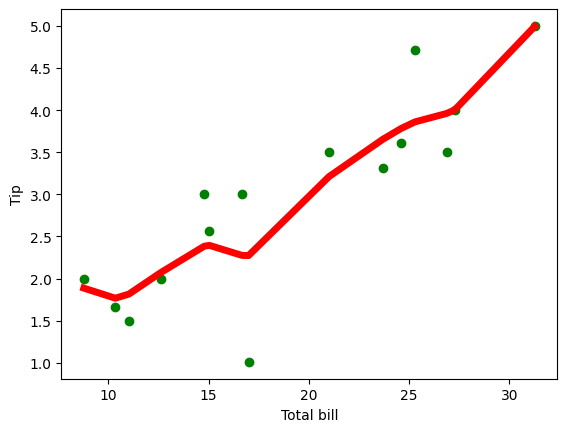

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point, X, k):
 diff = point - X
 return np.exp(-np.sum(diff**2, axis=1) / (2.0 * k**2))
def local_weight(point, X, y, k):
 W = np.diag(kernel(point, X, k))
 return np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
def local_weight_regression(X, y, k):
 return np.array([X[i] @ local_weight(X[i], X, y, k) for i in range(len(X))])
def plot(X, y, y_pred):
 sort_idx = X[:, 1].argsort()
 plt.scatter(X[:, 1], y, color='green')
 plt.plot(X[sort_idx, 1], y_pred[sort_idx], color='red', linewidth=5)
 plt.xlabel('Total bill')
 plt.ylabel('Tip')
 plt.show()
data = pd.read_csv('data.csv')
X = np.column_stack((np.ones(len(data)), data['total_bill']))
y = data['tip'].values
y_pred = local_weight_regression(X, y, 10)
plot(X, y, y_pred)